##Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [4]:
#loading the dataset
df = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='ISO-8859-1')

##Data Manipulation

In [5]:
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [6]:
df.tail()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE
579,20,9,170,The overall quality of the teaching-learning p...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE


In [7]:
df.shape

(580, 12)

In [8]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [10]:
df.dtypes

,0
SN,int64
Total Feedback Given,int64
Total Configured,int64
Questions,object
Weightage 1,int64
Weightage 2,int64
Weightage 3,int64
Weightage 4,int64
Weightage 5,int64
Average/ Percentage,object


##Data Cleaning

In [11]:
df.isnull().sum()

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
#clean columns
df.rename(columns=lambda x: x.strip(), inplace=True)

In [14]:
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [15]:
df['Average/ Percentage']

,Average/ Percentage
0,3.00 / 60.00
1,5.00 / 100.00
2,5.00 / 100.00
3,3.00 / 60.00
4,4.00 / 80.00
...,...
575,4.33 / 86.67
576,4.67 / 93.33
577,4.56 / 91.11
578,4.44 / 88.89


In [16]:
#Split Average/ Percentage into two numeric columns
df[['Average', 'Percentage']] = df['Average/ Percentage'].str.split('/', expand=True)

In [17]:
#convert to float and clean spaces
df['Percentage'] = df['Percentage'].str.strip().astype(float)

In [18]:
#convert to float and clean spaces
df["Percentage"] = pd.to_numeric(df["Percentage"], errors="coerce")

In [19]:
df

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Average,Percentage
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.00,60.00
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.00,100.00
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.00,100.00
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.00,60.00
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.00,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE,4.33,86.67
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE,4.67,93.33
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE,4.56,91.11
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE,4.44,88.89


In [20]:
df['Questions']

,Questions
0,How much of the syllabus was covered in the cl...
1,How well did the teachers prepare for the clas...
2,How well were the teachers able to communicate?
3,The teachers approach to teaching can best be...
4,Fairness of the internal evaluation process by...
...,...
575,The institute/ teachers use student-centric me...
576,Teachers encourage you to participate in extra...
577,Efforts are made by the institute/ teachers to...
578,What percentage of teachers use ICT tools such...


In [21]:
#remove special characters in questions
df["Questions"] = df["Questions"].str.replace("", "'", regex=False)

In [22]:
df['Questions']

,Questions
0,How much of the syllabus was covered in the cl...
1,How well did the teachers prepare for the clas...
2,How well were the teachers able to communicate?
3,The teacher's approach to teaching can best be...
4,Fairness of the internal evaluation process by...
...,...
575,The institute/ teachers use student-centric me...
576,Teachers encourage you to participate in extra...
577,Efforts are made by the institute/ teachers to...
578,What percentage of teachers use ICT tools such...


In [23]:
#remove irrelevant columns
df.drop(columns=['Average/ Percentage', 'SN', 'Total Configured'], inplace=True)

In [24]:
df.head()

,Total Feedback Given,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Course Name,Basic Course,Average,Percentage
0,1,How much of the syllabus was covered in the cl...,0,0,1,0,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.00,60.0
1,1,How well did the teachers prepare for the clas...,0,0,0,0,1,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.00,100.0
2,1,How well were the teachers able to communicate?,0,0,0,0,1,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.00,100.0
3,1,The teacher's approach to teaching can best be...,0,0,1,0,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.00,60.0
4,1,Fairness of the internal evaluation process by...,0,0,0,1,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.00,80.0


##Rating Analysis

In [25]:
df['Average']

,Average
0,3.00
1,5.00
2,5.00
3,3.00
4,4.00
...,...
575,4.33
576,4.67
577,4.56
578,4.44


In [26]:
df['Average'].max()

'5.00 '

In [27]:
df['Average'].min()

'1.33 '

In [28]:
print(f"Data type: {df['Average'].dtype}")

Data type: object


In [29]:
#convert Average to numeric
df['Average'] = pd.to_numeric(df['Average'], errors='coerce')

In [30]:
df['Average'].isnull().sum()

np.int64(0)

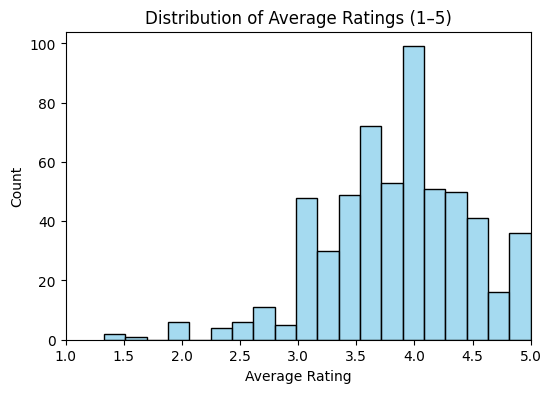

In [31]:
#Distribution Of Average rating
plt.figure(figsize=(6,4))
sns.histplot(df['Average'], bins=20, kde=False, color="skyblue")
plt.title("Distribution of Average Ratings (1–5)")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.xlim(1, 5)
plt.show()



In [32]:
#Average rating per question
avg_question = df.groupby('Questions')['Average'].mean().sort_values(ascending=False)
print("Top questions")
print(avg_question.head(10))

Top questions
Questions
Fairness of the internal evaluation process by the teachers.                                                                                           4.215517
How well were the teachers able to communicate?                                                                                                        4.197241
How well did the teachers prepare for the classes?                                                                                                     4.090000
The teachers illustrate the concepts through examples and applications.                                                                                4.067241
Teachers inform you about your expected competencies, course outcomes and program\noutcomes.                                                           3.979655
How much of the syllabus was covered in the class?                                                                                                     3.953103
Was your perform

In [33]:
#Average rating per course
avg_course = df.groupby('Course Name')['Average'].mean().sort_values(ascending=False)
print("\nAverage Rating per Course")
print(avg_course.head(10))


Average Rating per Course
Course Name
FYBA                              4.5500
MSC ANALYTICAL CHEMISTRY SEM I    4.5250
TYBSC                             4.5240
MSC INFORMATION TECHNOLOGY - 1    4.5000
SYBMS                             4.3570
FY BCOM (BANKING & INSURANCE)     4.3500
M.SC PART - 2 COMPUTER SCIENCE    4.2285
MSC INFORMATION TECHNOLOGY - 3    4.2090
S.Y.B.A.F                         4.1325
TYBA                              4.1200
Name: Average, dtype: float64


##Word Cloud

In [34]:
all_text = ' '.join(df['Questions'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate(all_text)

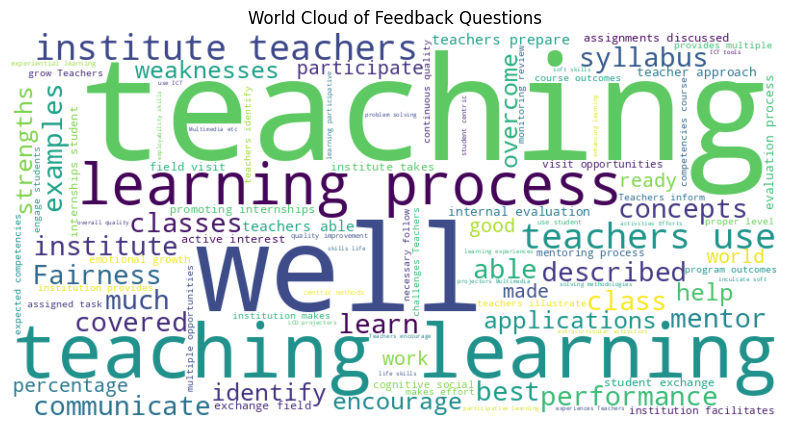

In [35]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('World Cloud of Feedback Questions')
plt.show()

##Correlation

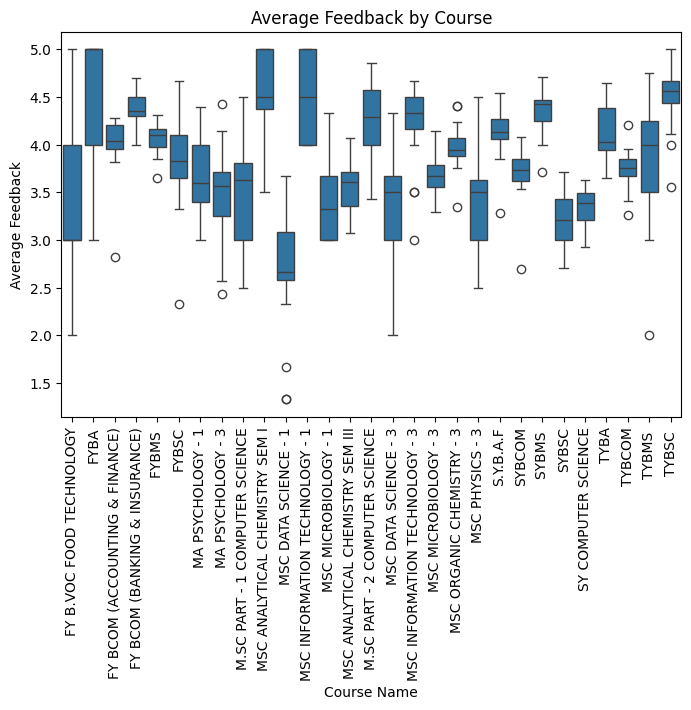

In [36]:
#compare courses by their average feedback
plt.figure(figsize=(8,5))
sns.boxplot(x="Course Name", y="Average", data=df)
plt.title("Average Feedback by Course")
plt.xlabel("Course Name")
plt.ylabel("Average Feedback")
plt.xticks(rotation=90)
plt.show()

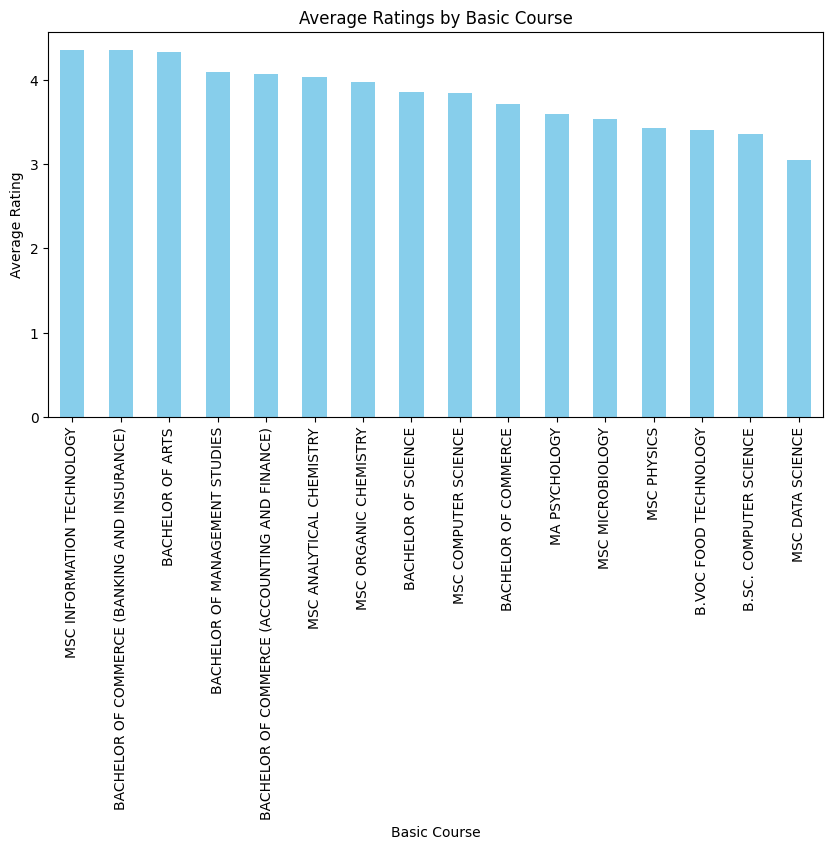

In [37]:
avg_course = df.groupby("Basic Course")["Average"].mean().sort_values(ascending=False)
avg_course.plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Average Ratings by Basic Course")
plt.ylabel("Average Rating")
plt.show()


#Insights and Recommendations

In [38]:
print("Top 3 Aspects with Highest Ratings:")
print(avg_question.head(3))

print("\nBottom 3 Aspects with Lowest Ratings:")
print(avg_question.tail(3))

print("\nCourses Ranked by Average Feedback:")
print(avg_course)

Top 3 Aspects with Highest Ratings:
Questions
Fairness of the internal evaluation process by the teachers.    4.215517
How well were the teachers able to communicate?                 4.197241
How well did the teachers prepare for the classes?              4.090000
Name: Average, dtype: float64

Bottom 3 Aspects with Lowest Ratings:
Questions
The teachers identify your strengths and encourage you to provide the proper level of challenges.                     3.615172
What percentage of teachers use ICT tools such as LCD projectors, Multimedia, etc. while teaching?                    3.582759
The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.    3.577931
Name: Average, dtype: float64

Courses Ranked by Average Feedback:
Basic Course
MSC INFORMATION TECHNOLOGY                       4.354500
BACHELOR OF COMMERCE (BANKING AND INSURANCE)     4.350000
BACHELOR OF ARTS                                 4.335000
BACHELOR OF MANAGEMEN

In [39]:
#Variability in ratings
course_variability = df.groupby('Course Name')['Average'].std().sort_values(ascending=False)
print("1. Courses with most mixed ratings (high variability)")
print(course_variability.head(3))
print("\n2. Courses with most consistent ratings (low variability):")
print(course_variability.tail(3))


1. Courses with most mixed ratings (high variability)
Course Name
FY B.VOC FOOD TECHNOLOGY    0.940325
MSC DATA SCIENCE - 1        0.690053
MSC PHYSICS - 3             0.634014
Name: Average, dtype: float64

2. Courses with most consistent ratings (low variability):
Course Name
SY COMPUTER SCIENCE              0.188665
FY BCOM (BANKING & INSURANCE)    0.176963
FYBMS                            0.175003
Name: Average, dtype: float64


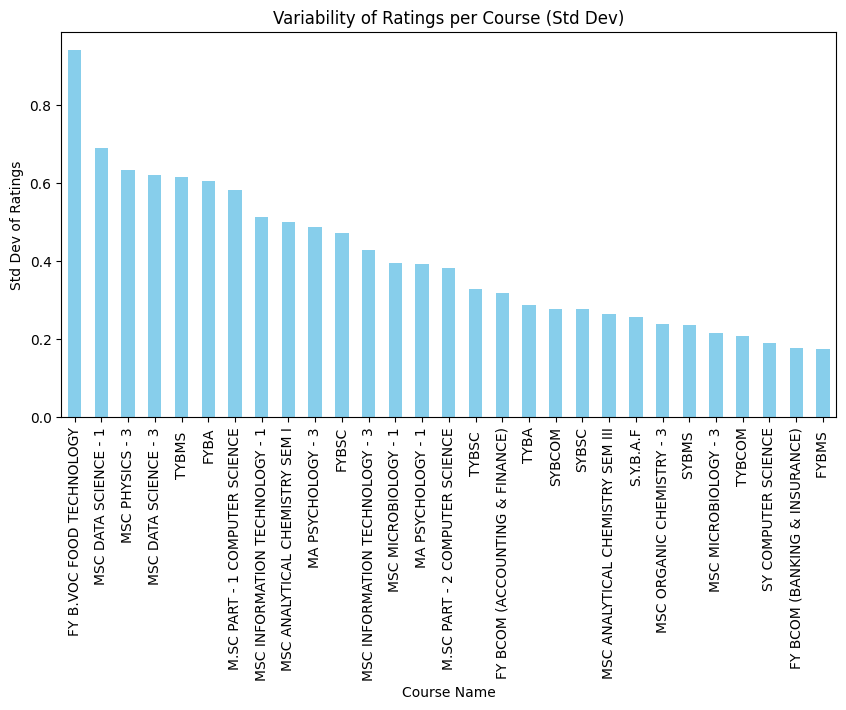

In [40]:
plt.figure(figsize=(10,5))
course_variability.plot(kind="bar", color="skyblue")
plt.title("Variability of Ratings per Course (Std Dev)")
plt.xlabel("Course Name")
plt.ylabel("Std Dev of Ratings")
plt.xticks(rotation=90)
plt.show()

In [41]:
#percentage Trends
percentage_summary = df.groupby('Course Name')['Percentage'].mean()
above_80 = (percentage_summary > 80).sum()
below_60 = (percentage_summary < 60).sum()
total_courses = percentage_summary.shape[0]

print(f"\nOut of {total_courses} courses:")
print(f"- {above_80} courses have average satisfaction above 80%")
print(f"- {below_60} courses have average satisfaction below 60%")


Out of 29 courses:
- 12 courses have average satisfaction above 80%
- 1 courses have average satisfaction below 60%


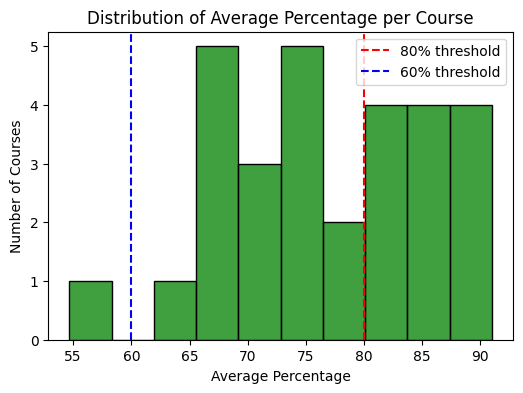

In [42]:
#Plotting of percentages
plt.figure(figsize=(6,4))
sns.histplot(percentage_summary, bins=10, color="green")
plt.axvline(80, color='red', linestyle='--', label="80% threshold")
plt.axvline(60, color='blue', linestyle='--', label="60% threshold")
plt.title("Distribution of Average Percentage per Course")
plt.xlabel("Average Percentage")
plt.ylabel("Number of Courses")
plt.legend()
plt.show()

In [43]:
# Variability in Ratings (Per Question)
question_variability = df.groupby('Questions')['Average'].std().sort_values(ascending=False)

print("Questions with most mixed ratings (high variability):")
print(question_variability.head(3))

print("\nQuestions with most consistent ratings (low variability):")
print(question_variability.tail(3))

Questions with most mixed ratings (high variability):
Questions
The teachers identify your strengths and encourage you to provide the proper level of challenges.                     0.893059
The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.    0.745809
Your mentor does a necessary follow-up with an assigned task to you.                                                  0.740706
Name: Average, dtype: float64

Questions with most consistent ratings (low variability):
Questions
How well did the teachers prepare for the classes?                      0.461628
Fairness of the internal evaluation process by the teachers.            0.425513
Teachers encourage you to participate in extracurricular activities.    0.414530
Name: Average, dtype: float64


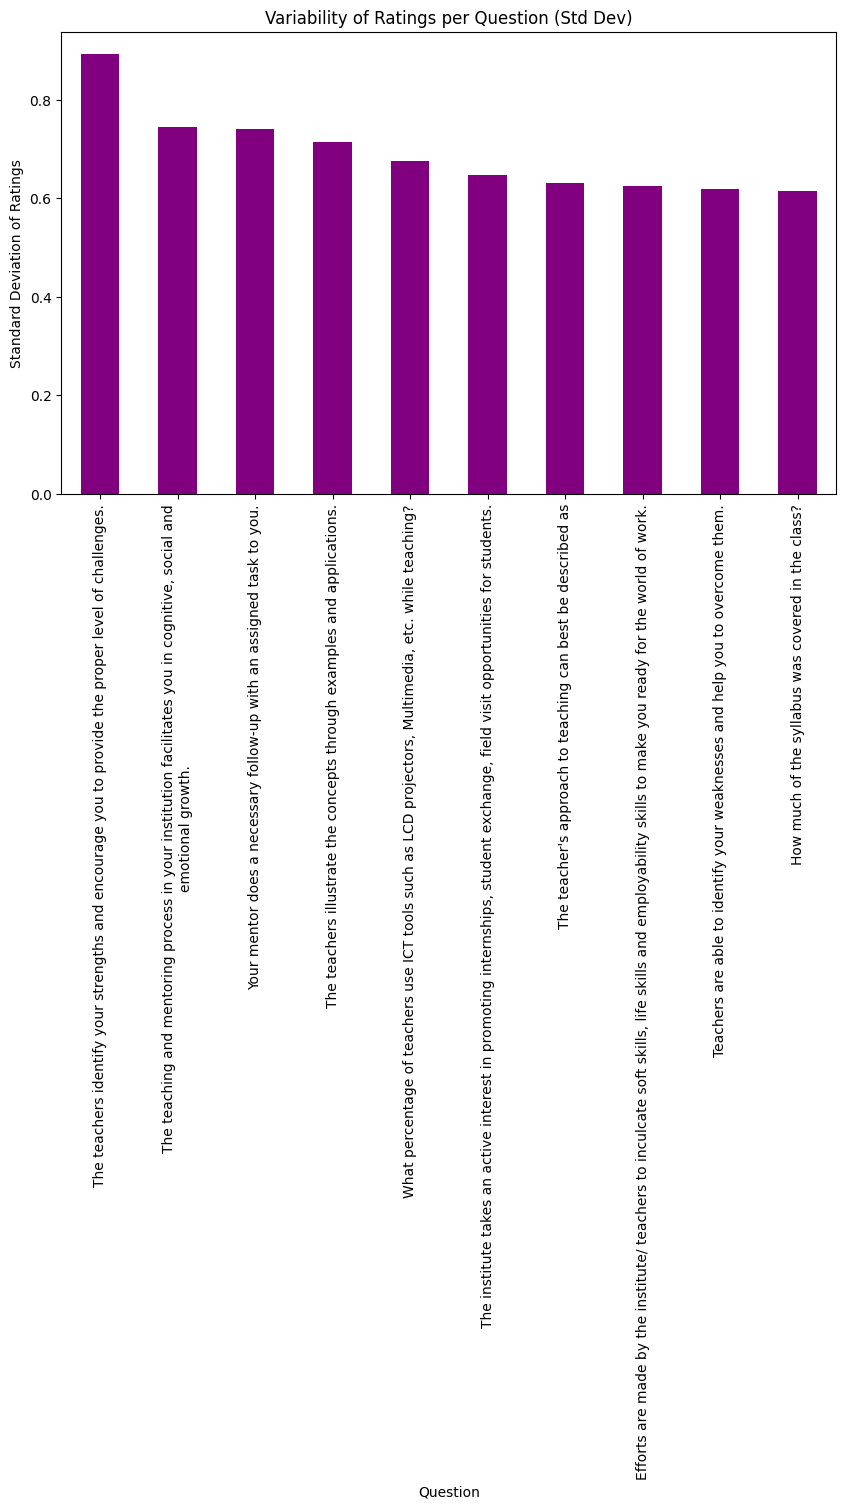

In [44]:
# Optional: plot variability per question (top 15 for readability)
plt.figure(figsize=(10,6))
question_variability.head(10).plot(kind='bar', color='purple')
plt.title("Variability of Ratings per Question (Std Dev)")
plt.xlabel("Question")
plt.ylabel("Standard Deviation of Ratings")
plt.xticks(rotation=90)
plt.show()
